In [22]:
# importing the necessary Dependencies and Setup
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#loading and reading csv data from data storage
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")
mouse_test_data = pd.read_csv("data/mouse_drug_data.csv")

In [24]:
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [25]:
mouse_test_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [26]:
# combing the two data to a single datasets as merged_drug_test
merged_drug_test = pd.merge(clinical_trial_data, mouse_test_data, how ="outer", on="Mouse ID")

In [6]:
merged_drug_test.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [27]:
merged_drug = merged_drug_test.loc[:,["Drug","Timepoint","Tumor Volume (mm3)"]]

In [28]:
merged_drug.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [29]:
merged_drug_test['Drug'].value_counts()

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug, dtype: int64

In [30]:
# From the above table, the clinical trial is done for 10 different drug. However, I need to examine four drugs
four_drug_test= merged_drug_test[(merged_drug_test["Drug"] == "Capomulin") |
                                  (merged_drug_test["Drug"] == "Infubinol") |
                                  (merged_drug_test["Drug"] == "Ketapril") |
                                  (merged_drug_test["Drug"] == "Placebo")]

In [31]:
four_drug_test["Drug"].value_counts()

Capomulin    230
Ketapril     188
Placebo      181
Infubinol    178
Name: Drug, dtype: int64

In [32]:
four_drug_test.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [33]:
# calculating the mean tumor volume data grouped by Drug and Timepoint and converting to dataframe
tumor_volume_mean = pd.DataFrame(four_drug_test.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]) 

In [34]:
# Preview DataFrame
tumor_volume_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [35]:
# Reshaping tumor volume data
tumor_volume=tumor_volume_mean.unstack(level = "Drug")
tumor_volume.columns = tumor_volume.columns.get_level_values(1)
tumor_volume

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [36]:
#Creating dataframe for the standard error of Volumes grouped by Drug and Timepoint
tumor_volume_error = pd.DataFrame(four_drug_test.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"])

In [37]:
# preview DataFrame
tumor_volume_error.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [40]:
# Reshaping for standard error of volumes
tumor_std_err=tumor_volume_error.unstack(level = "Drug")
tumor_std_err.columns=tumor_std_err.columns.get_level_values(1)
# preview DataFrame
tumor_std_err

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [41]:
# Minor Data Muging by creating pivot table
tumor_response = pd.pivot_table(merged_drug_test, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)
tumor_response

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


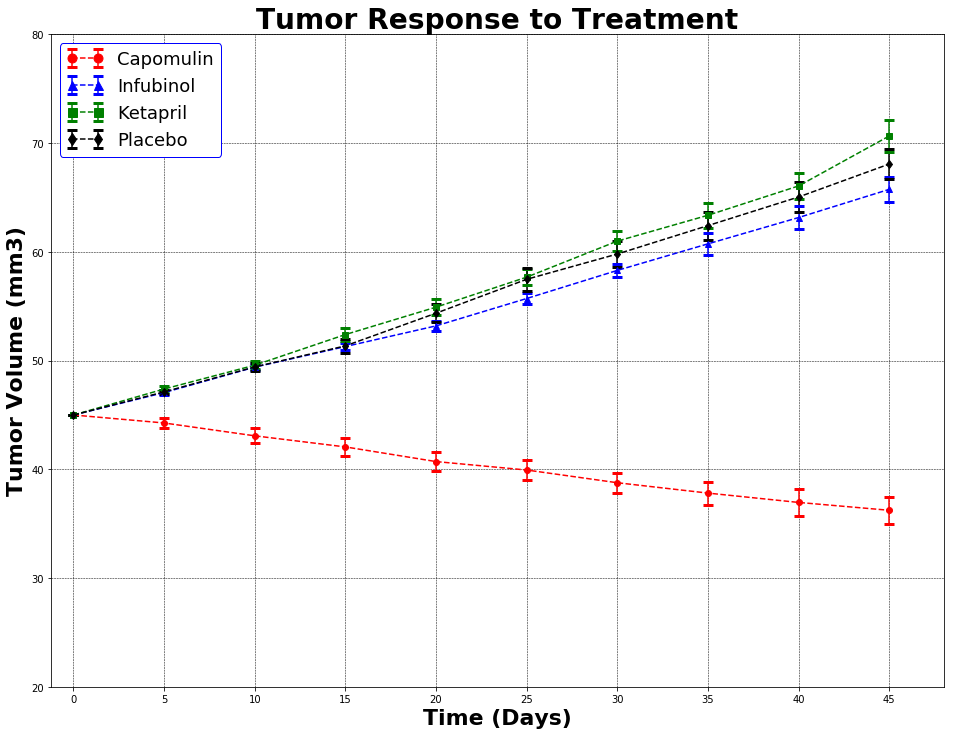

In [86]:
# Generate the Plot (with Error Bars)

x_axis = tumor_volume.index
plt.figure(figsize =(16,12))
plt.xlabel("Time (Days)", fontdict = {"fontsize" : 22, "fontweight": "bold"})
plt.ylabel("Tumor Volume (mm3)", fontdict = {"fontsize" : 22, "fontweight": "bold"})
plt.xlim(-1.25, tumor_volume.index.max()+3,10 )
plt.ylim(20,80,5)
plt.xticks(np.arange(0, tumor_volume.index.max()+3 , 5))
plt.title("Tumor Response to Treatment", fontdict = {"fontsize" : 28, "fontweight":"bold"})


markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']

# Creates plots for each drug with error bar
# z is iterable in plot loop

z = 0

for  item  in  tumor_volume.columns:                                             
    plt.errorbar(x_axis, 
                 tumor_volume[item],  
                 tumor_std_err[item],
                 marker =  markers[z],
                 color =  colors[z],
                 linestyle = '--',
                 capthick = 3, 
                 capsize = 5)
    z = z + 1
plt.legend(numpoints = 2, frameon = True, markerscale = 1.5, edgecolor = 'blue', fontsize = '18', framealpha = 1)
plt.grid(True)

# save the Figure
plt.savefig("Tumor_response.png")

plt.show()

## Metastatic Response to Treatment

In [91]:
# Minor Data Muging by creating pivot table
tumor_response = pd.pivot_table(merged_drug_test, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)
tumor_response

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [79]:
# creating dataframe and finding the average(mean) for metastatic sites data that grouped by Drug and Timepoint
metastatic_mean = pd.DataFrame(four_drug_test.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]) 

In [80]:
# Preview DataFrame
metastatic_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [81]:
# Reshaping metastatic sites mean data
metastatic_mean=metastatic_mean.unstack(level = "Drug")
metastatic_mean.columns = metastatic_mean.columns.get_level_values(1)
metastatic_mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [82]:
# finding the average (mean) Standard Error associated with Metastatic Sites Grouped by Drug and Timepoint and creating dataframe 

metastatic_error = pd.DataFrame(four_drug_test.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"])


In [48]:
# Preview DataFrame
metastatic_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [83]:
# Reshaping for standard error of metastatic sites
metastatic_error=metastatic_error.unstack(level = "Drug")
metastatic_error.columns = metastatic_error.columns.get_level_values(1)
metastatic_error

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


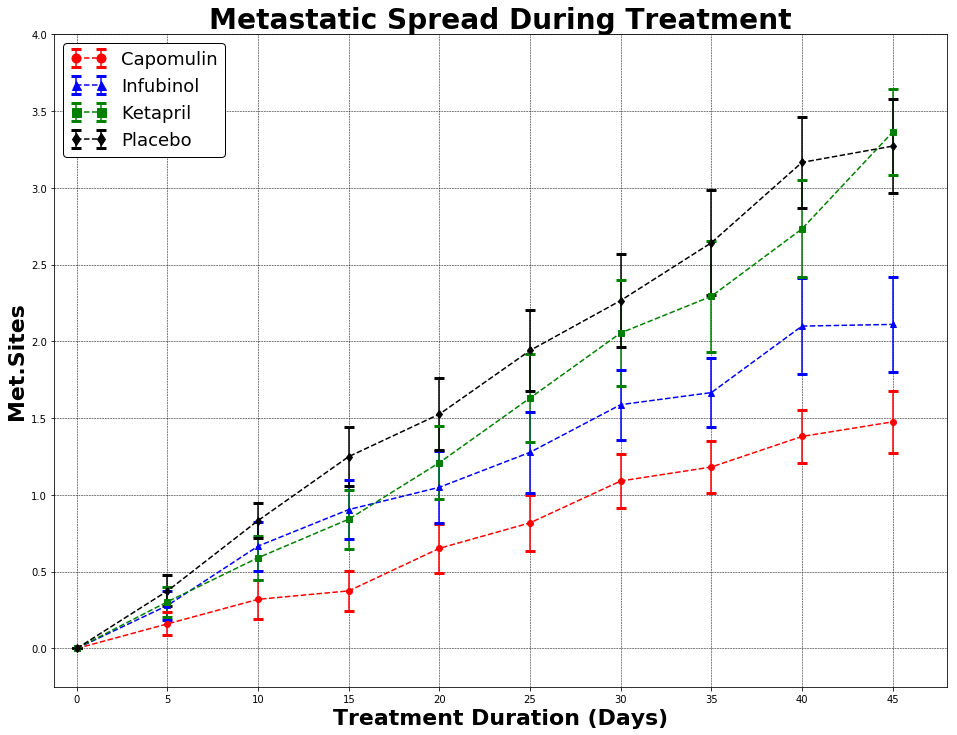

In [87]:
# Generate the Plot (with Error Bars)

# x_axis is timepoint
x_axis = metastatic_mean.index
plt.figure(figsize =(16,12))
plt.xlabel("Treatment Duration (Days)", fontdict = {"fontsize" : 22, "fontweight": "bold"})
plt.ylabel("Met.Sites", fontdict = {"fontsize" : 22, "fontweight": "bold"})
plt.xlim(-1.25, metastatic_mean.index.max()+3,10 )
plt.ylim(-0.25,4.0,0.5)
plt.xticks(np.arange(0, metastatic_mean.index.max()+3 , 5))
plt.title("Metastatic Spread During Treatment", fontdict = {"fontsize" : 28, "fontweight":"bold"})


markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']

# Creates plots for each metastatic sites with error bar
# z is iterable in plot loop

z = 0

for  item  in  metastatic_mean.columns:                                             
    plt.errorbar(x_axis, 
                 metastatic_mean[item],  
                 metastatic_error[item],
                 marker =  markers[z],
                 color =  colors[z],
                 linestyle = '--',
                 capthick = 3, 
                 capsize = 5)
    z = z + 1
plt.legend(numpoints = 2, frameon = True, markerscale = 1.5, edgecolor = 'black', fontsize = '18', framealpha = 1)
plt.grid(True)

# save the Figure
plt.savefig("Metastatic_Spread.png")

plt.show()

## Survival Rates

In [92]:
# Minor Data Muging by creating pivot table
tumor_response = pd.pivot_table(merged_drug_test, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)
tumor_response

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [88]:
# since we are examining only for four drugs, getting the number os mices at each time point per each 
# four drug is the survival of mices during treatment

# taking data from the begining for four drug_test data
four_drug_test.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [53]:
#finding the count of Mice grouped by Drug and Timepoint is:
survive_count = four_drug_test.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

In [54]:
survive_count = survive_count.unstack(level = "Drug")

In [55]:
survive_count

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


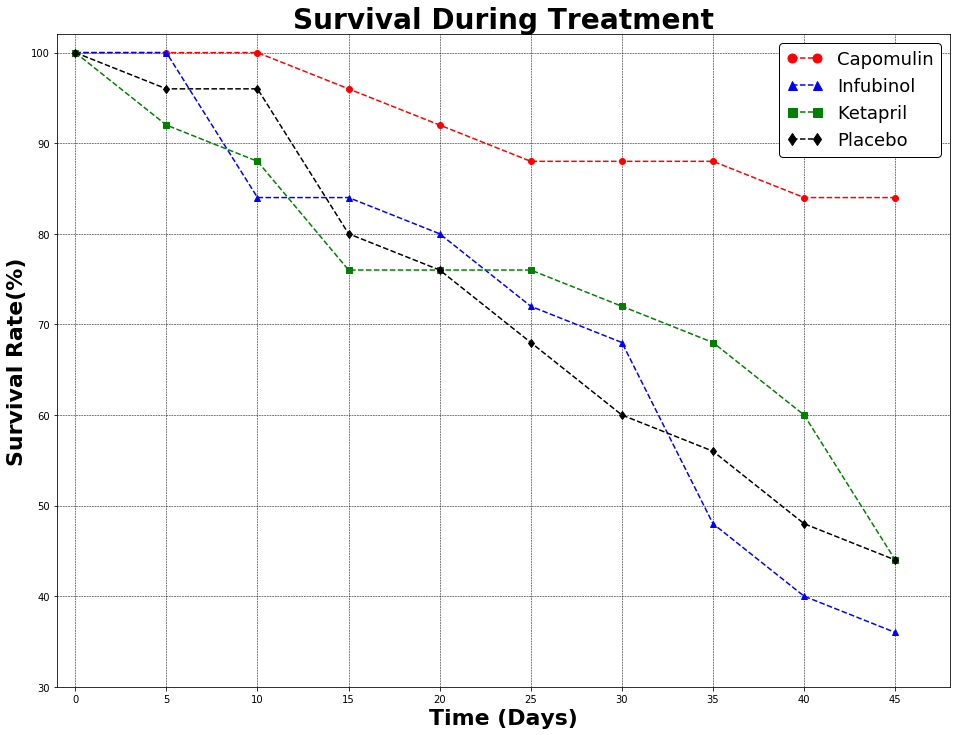

In [89]:
# Generate the Plot (with Error Bars)

#x_axis is the timepoint
x_axis = survive_count.index

# y_axis is the survival rate

plt.figure(figsize =(16,12))
plt.xlabel("Time (Days)", fontdict = {"fontsize" : 22, "fontweight": "bold"})
plt.ylabel("Survival Rate(%)", fontdict = {"fontsize" : 22, "fontweight": "bold"})
plt.xlim(-1.0, survive_count.index.max()+3,10 )
plt.ylim(30,102,10)
plt.xticks(np.arange(0, survive_count.index.max()+3 , 5))
plt.title("Survival During Treatment", fontdict = {"fontsize" : 28, "fontweight":"bold"})


markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']

# Creates plots for each survival rate
# z is iterable in plot loop

z = 0

for  x  in  survive_count.columns:
    y_axis = survive_count[x]/survive_count.loc[0,x] * 100
    plt.errorbar(x_axis,
                 y_axis,
                 marker =  markers[z],
                 color =  colors[z],
                 linestyle = '--',)
    z = z + 1
plt.legend(numpoints = 2, frameon = True, markerscale = 1.5, edgecolor = 'black', fontsize = '18', framealpha = 1)
plt.grid(True)

# save the Figure
plt.savefig("Survival_Rate.png")

plt.show()

## Summary Bar Graph

NB:- the difference between tumor volume (mm3) at the begining of the study (Timepoint 0) and at the end of the study (Timepoint 45) is the tumor change for each drug. Therefore, (Tumor Volume at Timepoint 45 - Tumor Volume at Timepoint 0)/Tumor Volume at Timepoint 0 and multiplied by 100 is Percent Tumor Change 

In [57]:
tumor_volume

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [58]:
# Calculating the percent tumor change
tumor_change = ((tumor_volume.loc[45,:] - tumor_volume.loc[0,:])/tumor_volume.loc[0,:]) * 100

In [59]:
tumor_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

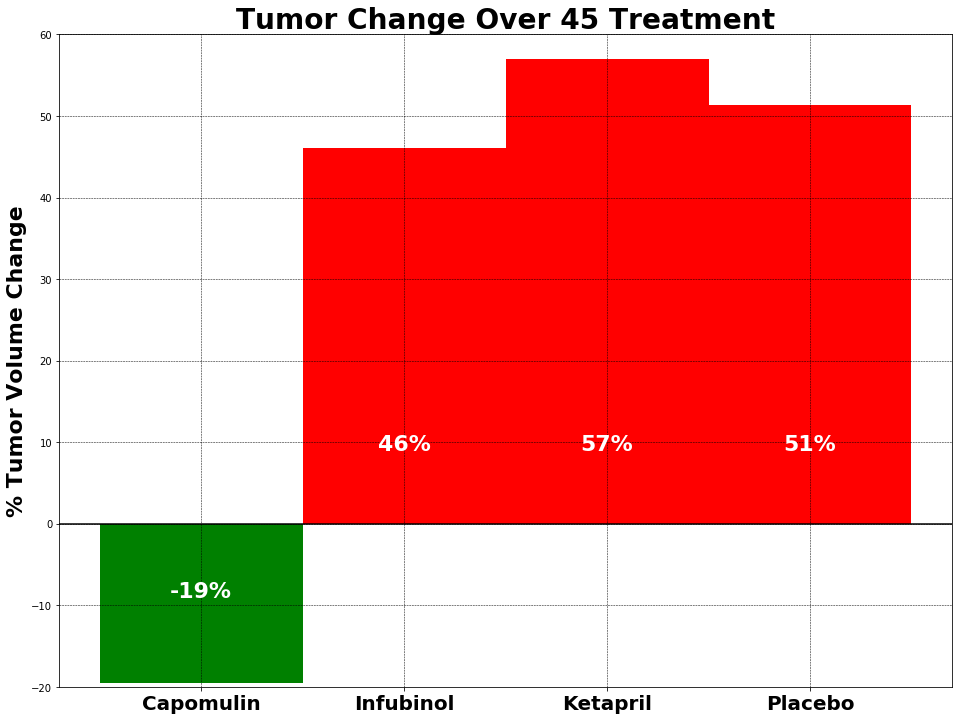

In [90]:
#Bar graph plot
x_axis = tumor_change.index
plt.figure(figsize =(16,12))

# to inser horizontal line on y_axis at zero
plt.axhline(y=0, color = "black" )
plt.ylabel("% Tumor Volume Change", fontdict = {"fontsize" : 22, "fontweight": "bold"})
plt.ylim(-20,60,20)

# put drug name for x_axis 
plt.xticks(np.arange(len(x_axis)), x_axis, weight ="bold", fontsize = 20 )
plt.title("Tumor Change Over 45 Treatment", fontdict = {"fontsize" : 28, "fontweight":"bold"})
plt.bar(np.arange(4), tumor_change, width=1, color = ["red" if tumor_change[value] > 0
                                            else "green" for value in np.arange(len(x_axis))
                                            ])
# loop to every tumor change for four drug test
z = 0
for x in tumor_change:
    if x < 0:
        y = -9
    else:
        y = 9
    plt.text(z, y, str(int(x)) + "%", ha = "center", color = "white", fontdict = {"fontsize" : 22, "fontweight": "bold"})
    z = z + 1
plt.grid(True)
plt.rc("grid", linestyle = "--", color ="black", linewidth = 0.5)

# Saving the figure
plt.savefig("Tumor_change.png")

plt.show()